# 1. Primera base de datos. MHEALTH

## 1.1. Cargar datos

In [3]:
import pandas as pd
import os

In [5]:
pd.set_option("display.float_format", "{:.3f}".format)

In [7]:
from abc import ABC, abstractmethod

class AbstractDataLoader(ABC):
    def __init__(self, src_path:str, keys:list, file_extension:str, delimiter:str):
        self.src_path = src_path
        self.keys = keys
        self.file_extension = file_extension
        self.delimiter = delimiter     
        
    @abstractmethod
    def load_data(self):
        pass

    @abstractmethod
    def _is_valid_extension(self, file):
        pass

In [9]:
class DataLoader(AbstractDataLoader):
    def __init__(self, src_path:str, keys:list, file_extension:str, delimiter:str):
        super().__init__(src_path, keys, file_extension, delimiter)
        
    
    def load_data(self):
        dataframes = []
        for file in os.listdir(self.src_path):
            if self._is_valid_extension(file):  
                df = pd.read_csv(os.path.join(self.src_path, file), delimiter=self.delimiter, names=self.keys)
                df['subject_id'] = self._get_subject_id(file)
                dataframes.append(df)
        final_df = pd.concat(dataframes, ignore_index=True)
        return final_df

                
    def _is_valid_extension(self, file):
        return file.endswith(self.file_extension)

    def _get_subject_id(self, file):
        return file.split('.')[0]

In [11]:
src = 'datasets/1_mhealth/MHEALTHDATASET/'
keys = ['x_acc_chest','y_acc_chest','z_acc_chest',
        'ecg1','ecg2',
        'x_acc_lef_ank','y_acc_lef_ank','z_acc_lef_ank',
        'x_gyro_lef_ank','y_gyro_lef_ank','z_gyro_lef_ank',
        'x_mgnt_lef_ank','y_mgnt_lef_ank','z_mgnt_lef_ank',
        'x_acc_rgt_low_arm','y_acc_rgt_low_arm','z_acc_rgt_low_arm',
       'x_gyro_rgt_low_arm','y_gyro_rgt_low_arm','z_gyro_rgt_low_arm',
       'x_mgnt_rgt_low_arm','y_mgnt_rgt_low_arm','z_mgnt_rgt_low_arm','null_class']
file_extension = '.log'
delimiter = r'\s+'
data_loader = DataLoader(src, keys, file_extension, delimiter)
fusioned_df = data_loader.load_data()

## 1.2. Dimensiones y primeras 5 filas

Una vez tenemos cargados los datos podemos empezar con su análisis. El primer paso es observar cuántos ejemplos y características tenemos. 

In [15]:
fusioned_df.shape

(1215745, 25)

Observamos que tensmo 1215745 ejemplos y 25 características

In [20]:
fusioned_df.head()

,x_acc_chest,y_acc_chest,z_acc_chest,ecg1,ecg2,x_acc_lef_ank,y_acc_lef_ank,z_acc_lef_ank,x_gyro_lef_ank,y_gyro_lef_ank,...,y_acc_rgt_low_arm,z_acc_rgt_low_arm,x_gyro_rgt_low_arm,y_gyro_rgt_low_arm,z_gyro_rgt_low_arm,x_mgnt_rgt_low_arm,y_mgnt_rgt_low_arm,z_mgnt_rgt_low_arm,null_class,subject_id
0,-9.818,0.010,0.296,0.004,0.004,2.185,-9.697,0.631,0.104,-0.841,...,-4.578,0.188,-0.449,-1.010,0.034,-2.350,-1.610,-0.031,0,mHealth_subject1
1,-9.849,0.524,0.373,0.004,0.017,2.388,-9.508,0.684,0.085,-0.839,...,-4.320,0.024,-0.449,-1.010,0.034,-2.163,-0.883,0.327,0,mHealth_subject1
2,-9.660,0.182,0.437,0.017,0.038,2.409,-9.567,0.681,0.085,-0.839,...,-4.277,0.276,-0.449,-1.010,0.034,-1.617,-0.166,-0.031,0,mHealth_subject1
3,-9.651,0.214,0.240,0.080,0.117,2.181,-9.430,0.550,0.085,-0.839,...,-4.316,0.368,-0.457,-1.008,0.026,-1.077,0.007,-0.383,0,mHealth_subject1
4,-9.703,0.304,0.312,0.222,0.205,2.417,-9.389,0.711,0.085,-0.839,...,-4.146,0.407,-0.457,-1.008,0.026,-0.537,0.176,-1.095,0,mHealth_subject1


## 1.3. Identifica y elimina los datos ausentes

Una vez observamos que tenemos 25 columnas, queremos asegurarnos de que todas tienen datos. Esto porque los modelos de aprendizaje máquina esperan recibir como entrada vectores de enteros, y un valor faltante haría imposible su procesamiento. En términos de separar las clases, lo que queremos es obtener una línea (o, en este caso, hiperplano) que separe los ejemplos, y si algún ejemplo no tiene un valor, no sería posible localizarlo en el plano cartesiano, y por lo tanto no sería posible dibujar una curva que los separe y no podríamos clasificarlos. Es por esto que nos interesa eliminar los valores falantes.

In [24]:
fusioned_df.isnull().sum()

x_acc_chest           0
y_acc_chest           0
z_acc_chest           0
ecg1                  0
ecg2                  0
x_acc_lef_ank         0
y_acc_lef_ank         0
z_acc_lef_ank         0
x_gyro_lef_ank        0
y_gyro_lef_ank        0
z_gyro_lef_ank        0
x_mgnt_lef_ank        0
y_mgnt_lef_ank        0
z_mgnt_lef_ank        0
x_acc_rgt_low_arm     0
y_acc_rgt_low_arm     0
z_acc_rgt_low_arm     0
x_gyro_rgt_low_arm    0
y_gyro_rgt_low_arm    0
z_gyro_rgt_low_arm    0
x_mgnt_rgt_low_arm    0
y_mgnt_rgt_low_arm    0
z_mgnt_rgt_low_arm    0
null_class            0
subject_id            0
dtype: int64

En este caso podemos observar que no hay valores faltantes. Por lo que no tenemos que realizar el proceso de eliminarlos.

## 1.4. Tipos de datos de cada atributo

Queremos saber los tipos de datos que tenemos para saber como procesarlos. Los modelos de aprendizaje máquina solo trabajan sobre vectores numéricos, por lo que sería imposible trabajar con strings u otro tipo de objetos. Es por esto que queremos determinar los tipos de datos y así transformarlos en el formato adecuado. 

In [33]:
fusioned_df.dtypes

x_acc_chest           float64
y_acc_chest           float64
z_acc_chest           float64
ecg1                  float64
ecg2                  float64
x_acc_lef_ank         float64
y_acc_lef_ank         float64
z_acc_lef_ank         float64
x_gyro_lef_ank        float64
y_gyro_lef_ank        float64
z_gyro_lef_ank        float64
x_mgnt_lef_ank        float64
y_mgnt_lef_ank        float64
z_mgnt_lef_ank        float64
x_acc_rgt_low_arm     float64
y_acc_rgt_low_arm     float64
z_acc_rgt_low_arm     float64
x_gyro_rgt_low_arm    float64
y_gyro_rgt_low_arm    float64
z_gyro_rgt_low_arm    float64
x_mgnt_rgt_low_arm    float64
y_mgnt_rgt_low_arm    float64
z_mgnt_rgt_low_arm    float64
null_class              int64
subject_id             object
dtype: object

El DataFrame, como contiene NumPy arrays, estos asignan valores numéricos a aquellas características cuyos valores sean solo numeros. Por otra parte, si tenemos una columna con strings u otro tipo de dato, lo asigna automáticamente como object. En este caso, observamos que tenemos una columna "subject_id" la cual es de tipo object. Esto es porque el subject_id es un identificador único para las diferentes personas de las cuales se obtuvieron las mediciones. Este es un ejemplo de valor en la característica subject_id: "mHealth_subject1". Como podemos observar esto es una cadena de caractéres. En este caso no es necesario tratar esta columna puesto que en realidad este valor no está directamente relacionado con los resultados de las mediciones (es decir, no influye en ellos). Pero no lo eliminaremos de momento porque nos ayuda a identificar a las diferentes personas que formaron parte del experimento y así dividir el dataset en entrenamiento y prueba evitando el data leakage. 

## 1.5. Resumen estadístico

En el resumen estadístico queremos saber si existe alguna diferencia grande entre los valores típicos de nuestros datos. Esto porque, si existe una garn diferencia, podría afectar el desempeño de clasificadores como los lineales o polínomiales, redes neuronales, K-NN, SVM, etc. Es por esto que queremos encontrar si existen diferencias para poder tratarlas. 

De la misma manera, estamos buscando si existen valores atípicos que puedan ser considerados ruido y que puedan afectar la capacidad de generalización de nuestro modelo. Estos nos interesa eliminarlos.

También buscamos saber si nuestra distribución de datos está sesgada, esto porque los modelos de aprendizaje máquina están armados para recibir valores insesgados. Entonces si estos existen tendríamos que eliminarlos para obtener el mejor desempeño para nuestro modelo.

In [38]:
fusioned_df.describe()

,x_acc_chest,y_acc_chest,z_acc_chest,ecg1,ecg2,x_acc_lef_ank,y_acc_lef_ank,z_acc_lef_ank,x_gyro_lef_ank,y_gyro_lef_ank,...,x_acc_rgt_low_arm,y_acc_rgt_low_arm,z_acc_rgt_low_arm,x_gyro_rgt_low_arm,y_gyro_rgt_low_arm,z_gyro_rgt_low_arm,x_mgnt_rgt_low_arm,y_mgnt_rgt_low_arm,z_mgnt_rgt_low_arm,null_class
count,1215745.000,1215745.000,1215745.000,1215745.000,1215745.000,1215745.000,1215745.000,1215745.000,1215745.000,1215745.000,...,1215745.000,1215745.000,1215745.000,1215745.000,1215745.000,1215745.000,1215745.000,1215745.000,1215745.000,1215745.000
mean,-8.522,-0.214,-1.056,-0.005,-0.005,1.494,-9.693,-0.955,-0.002,-0.617,...,-3.713,-5.806,2.394,-0.276,-0.466,0.267,0.170,0.714,-0.367,1.741
std,4.075,2.139,3.574,0.747,0.727,3.826,4.171,5.462,0.491,0.355,...,4.764,5.758,3.877,0.528,0.556,0.564,26.676,33.445,69.551,3.284
min,-22.438,-20.188,-18.401,-8.620,-8.620,-22.146,-19.619,-19.373,-2.147,-7.790,...,-22.361,-18.972,-18.239,-8.339,-3.571,-2.690,-319.030,-363.900,-717.550,0.000
25%,-9.804,-1.273,-2.867,-0.234,-0.188,0.141,-10.201,-2.649,-0.436,-0.818,...,-6.076,-9.404,0.130,-0.706,-0.897,-0.237,-6.192,-9.520,-14.238,0.000
50%,-9.311,-0.354,-0.870,-0.071,-0.042,1.309,-9.670,-0.016,-0.015,-0.707,...,-2.978,-7.462,1.928,-0.355,-0.634,0.302,0.363,0.352,-0.673,0.000
75%,-7.637,0.710,0.726,0.159,0.151,2.576,-9.042,1.301,0.449,-0.540,...,-1.194,-2.534,4.915,0.096,-0.107,0.778,6.792,10.076,13.186,2.000
max,19.094,20.927,26.196,8.515,8.519,20.054,21.161,25.015,60.484,2.011,...,19.864,22.191,25.741,3.320,1.556,2.750,251.150,337.760,657.180,12.000


En el diagrama de caja y bigotes podemos observar la distribución de las columnas de manera más clara:

## 1.6. Distribución de clases

En la distribución de clases, buscamos si existe un imbalance de clases. Un imbalance de clases hace que las métricas de desempeño no sean confiables puesto que, si el imbalance de clases es muy grande y nuestros datos en realidad se distribuyen naturalmente de forma imbalanceada, no podríamos saber si métricas como accuracy son confiables puesto que por pura probabilidad, si todas las clases las clasificara como la clase mayor, parecería que tenemos una buena performance. Si notamos un imbalance pronunciado, esto indica que para saber si el modelo tiene buen desempeño no es suficiente con mirar una sola métrica como accuracy, sino que tenemos que analizar las métricas por cada clase y en especial métricas como el F1-score. De la misma manera, si queremos saber si el modelo clasifica bien en general, no sería suficiente con sumar todos TP, TF, FP y FN, puesto que la clase mayor, al tener una mayor cantidad de instancias, terminaría ocupando una mayor cantidad, y las métricas convergerían hacia ella. Por lo que tendríamos que usar un macro average en lugar de un micro average, siendo el macro average el promedio de las métricas por clase. 

In [43]:
class_distribution = fusioned_df['null_class'].value_counts()
class_distribution

null_class
0     872550
1      30720
2      30720
3      30720
4      30720
9      30720
10     30720
11     30720
5      30720
7      29441
8      29337
6      28315
12     10342
Name: count, dtype: int64

En este caso, observamos que existe un imbalance de clases muy pronunciado, siendo la clase mayor la clase "0". Esta clase corresponde con periodos en los que ninguna actividad está ocurriendo, lo cual es normal ya que por lo general las personas no están realizando actividades, y es de esperar que la mayoría de mediciones correspondan a no realizar alguna actividad. 

Para hacernos una idea más clara de la distribución de las clases, podemos utilizar un gráfico de barras:

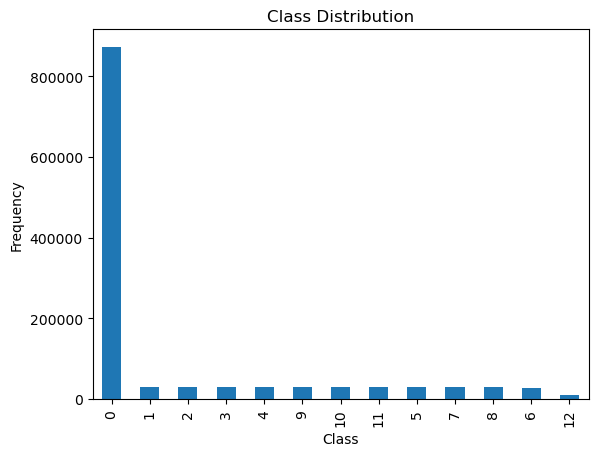

In [47]:
import matplotlib.pyplot as plt

class_distribution = fusioned_df['null_class'].value_counts()
class_distribution.plot(kind='bar') 
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.show()

La gráfica de barras hace más claro que la clase 0 es la que más instancias tiene, siendo esto un gran imbalance de clases. 

Como la clase 0 representa los valores en donde no hay actividad, podemos procesar estos con un downsampling ya que la variación de los datos en estas instancias debería ser muy pequeña (precisamente por que la persona no se mueve) y la variación en la desviación estándar de estos valores no debería cambiar mucho incluso si reducimos la cantidad de ejmplos.

Siendo tan desproporcionado la catidad de ejmplos que hay para la clase 0, no se puede apreciar bien en la gráfica si hay otras clases desbalanceadas. Para observarlo con mayor clariad, volvemos a realizar un gráfico de barras pero ahora excluyendo la clase 0.

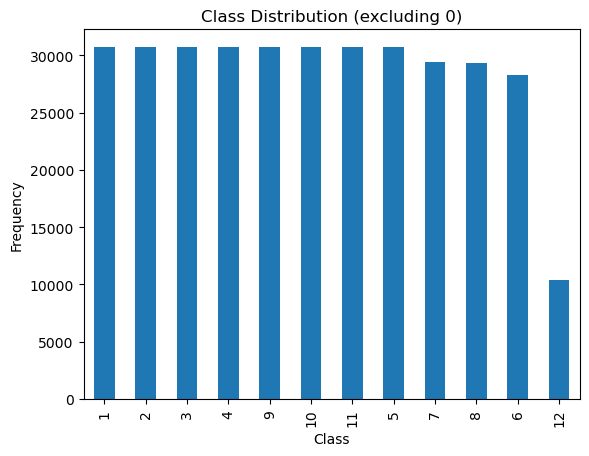

In [52]:
import matplotlib.pyplot as plt

# Filter out rows where 'null_class' is 0, then count the remaining classes
filtered_counts = fusioned_df[fusioned_df['null_class'] != 0]['null_class'].value_counts()

# Plot the resulting distribution
filtered_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution (excluding 0)')
plt.show()

Observamos que sí existe un imbalance de clase incluso dentro de las clases que sí corresponden a una actividad. Esto significa que no podemos simplemente usar métricas como accuracy para evaluar nuestros resultados (puesto que la clase 12 es la menos comun, y bastaría con clasificar normalmente las demás clases para que parezca que el modelo tiene buenos resultados sin contemplar si clasifica bien la clase 12). Por lo que será necesario utilizar métricas como Macro Average (para saber el desempeño general del modelo) y F1-score, para saber si clasifica bien cada clase. 

Asímismo, en lo que respecta al entrenamiento, tendremos que encontrar una manera de balancear esta clase minoritaria. 

## 1.7. Correlación entre atributos

Queremos encontrar sie existen valores corerlacionados, esto por dos razones:

1. **Merjoar clasificación**: Las características redundantes hacen que una misma característica tenga mayor importancia al clasificar.
2. **Menor costo computacional**: Las características requieren un gran costo computacional para procesarlas, a más tenemos mayor es el costo. Queremos reducir el costo lo máximo posible para no perder recursos procesando características innecesarias. Si están correlacionadas, significa que basta una para tener la cantidad necesaria de información.

In [58]:
import pandas as pd

df_filtered = fusioned_df.drop(columns=['mHealth_subject1'], errors='ignore')
df_numeric = df_filtered.select_dtypes(include=['number'])

corr_matrix = df_numeric.corr(method='pearson')
corr_matrix

,x_acc_chest,y_acc_chest,z_acc_chest,ecg1,ecg2,x_acc_lef_ank,y_acc_lef_ank,z_acc_lef_ank,x_gyro_lef_ank,y_gyro_lef_ank,...,x_acc_rgt_low_arm,y_acc_rgt_low_arm,z_acc_rgt_low_arm,x_gyro_rgt_low_arm,y_gyro_rgt_low_arm,z_gyro_rgt_low_arm,x_mgnt_rgt_low_arm,y_mgnt_rgt_low_arm,z_mgnt_rgt_low_arm,null_class
x_acc_chest,1.000,0.075,0.178,0.024,-0.003,0.050,0.306,0.102,0.043,0.248,...,0.266,0.193,0.007,0.065,0.130,0.073,0.010,0.012,0.003,0.127
y_acc_chest,0.075,1.000,-0.347,0.027,0.007,-0.028,-0.092,-0.100,-0.038,-0.120,...,0.060,-0.045,-0.027,0.040,-0.149,-0.011,-0.044,-0.059,0.123,0.094
z_acc_chest,0.178,-0.347,1.000,-0.010,-0.010,0.090,0.230,0.235,0.048,0.250,...,-0.071,0.309,0.004,-0.063,0.334,0.003,-0.006,-0.016,0.029,-0.131
ecg1,0.024,0.027,-0.010,1.000,0.597,0.004,0.003,0.000,-0.002,0.010,...,-0.006,-0.016,0.013,0.013,-0.025,-0.002,0.010,-0.019,0.021,0.002
ecg2,-0.003,0.007,-0.010,0.597,1.000,-0.002,-0.005,0.000,0.013,0.006,...,-0.011,-0.029,0.022,0.022,-0.033,-0.003,0.010,-0.006,0.003,-0.008
x_acc_lef_ank,0.050,-0.028,0.090,0.004,-0.002,1.000,0.018,-0.071,0.062,0.087,...,-0.051,0.060,-0.004,-0.026,0.064,0.016,-0.010,0.001,0.005,0.053
y_acc_lef_ank,0.306,-0.092,0.230,0.003,-0.005,0.018,1.000,0.078,0.049,0.350,...,0.067,0.106,0.092,0.050,0.152,0.105,-0.049,-0.061,0.005,0.000
z_acc_lef_ank,0.102,-0.100,0.235,0.000,0.000,-0.071,0.078,1.000,0.029,0.165,...,-0.125,0.193,0.087,0.042,0.077,-0.005,0.029,0.014,0.018,-0.088
x_gyro_lef_ank,0.043,-0.038,0.048,-0.002,0.013,0.062,0.049,0.029,1.000,0.138,...,0.015,-0.004,0.059,0.368,0.027,0.591,0.020,0.027,-0.030,0.114
y_gyro_lef_ank,0.248,-0.120,0.250,0.010,0.006,0.087,0.350,0.165,0.138,1.000,...,-0.079,0.139,0.083,0.106,0.204,0.124,-0.055,-0.039,0.065,0.035


## 1.8. Histograma de atributos

<Figure size 2000x4000 with 0 Axes>

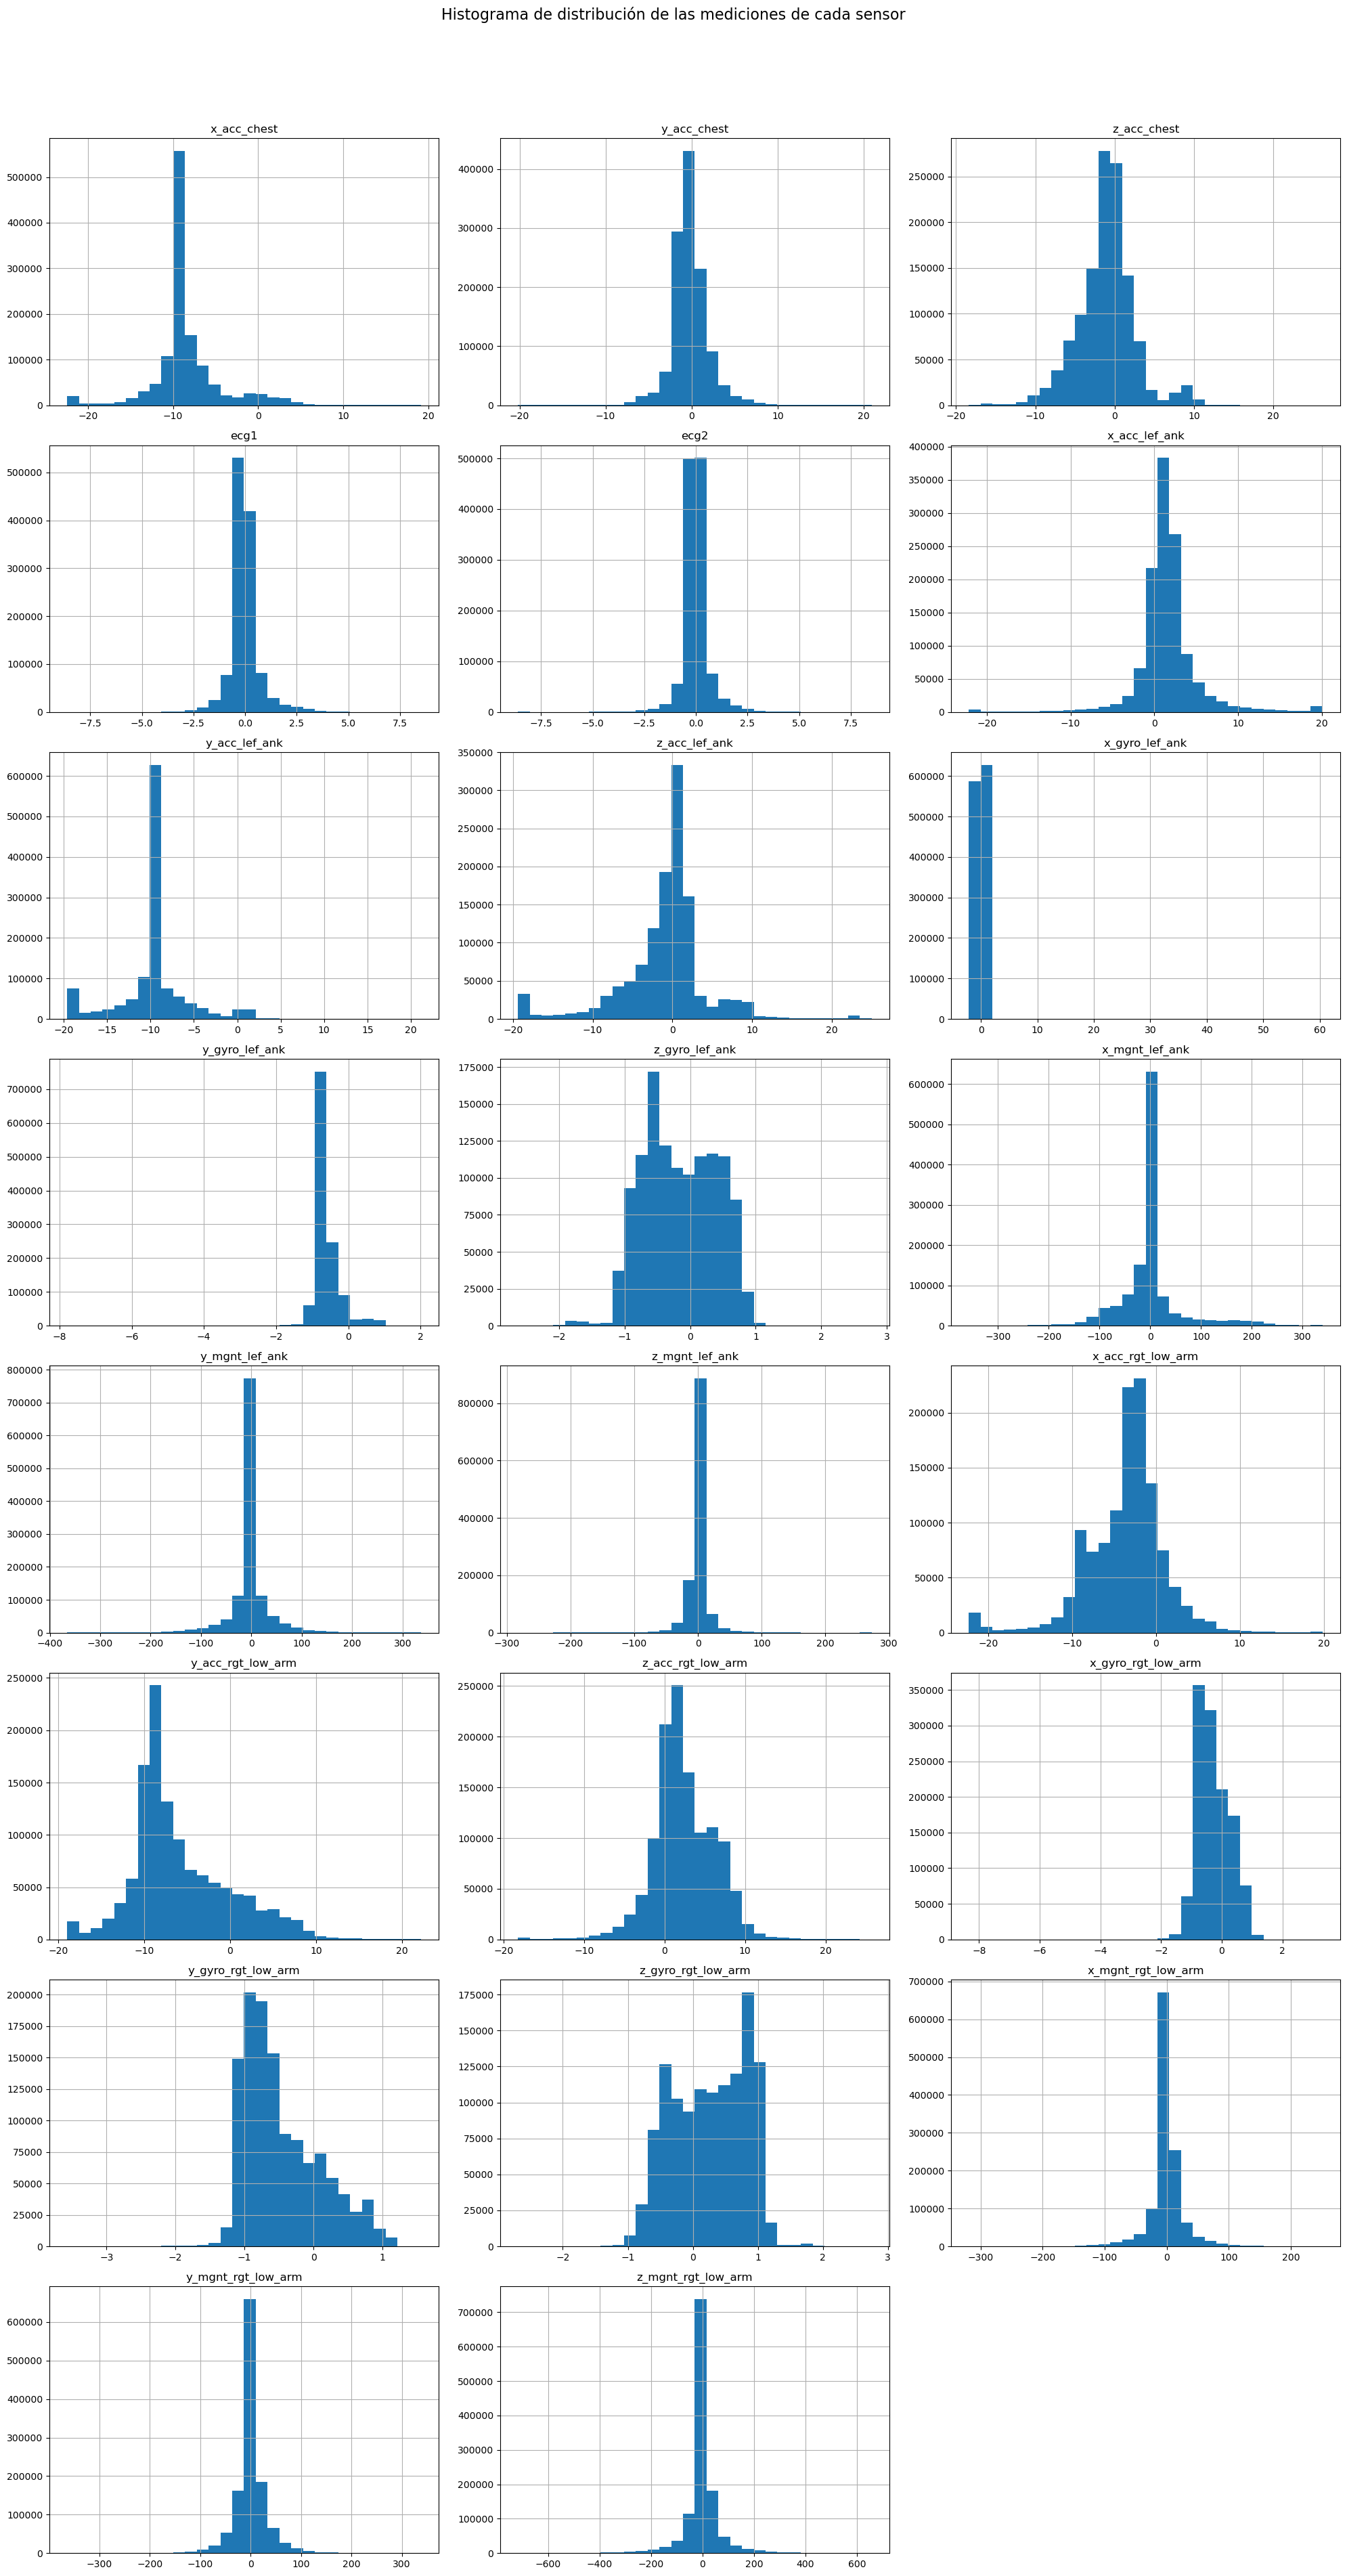

In [70]:
import matplotlib.pyplot as plt
import pandas as pd
import math
# Seleccionamos solo las columnas numéricas y excluimos 'null_class'
df_numeric = fusioned_df.select_dtypes(include=['number']).drop(columns=['null_class'], errors='ignore')

num_attributes = df_numeric.shape[1]

# Máximo 3 columnas por fila
cols = 3
rows = math.ceil(num_attributes / cols)

plt.figure(figsize=(20, 5 * rows))

df_numeric.hist(
    bins=30,
    layout=(rows, cols),
    figsize=(20, 5 * rows)
)

plt.suptitle("Histograma de distribución de las mediciones de cada sensor", fontsize=16)

# Ajustar espaciado para que el título no se sobreponga
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

Vemos que hay varios cuyas distribuciones no se asemejan a la normal.

## 1.9. Gráfica de densidad para los atributos

Conocer de forma gráfica la distribución de los datos nos permite identificar rápidamente sesgos y desviaciones en nuestros datos, esto es importante porque varios modelos asumen normalidad. Además, viendo la distribución podemos identificar a simple vista patrones que siguen nuestros datos

### 1.9.1 Datos acelerométricos del chest

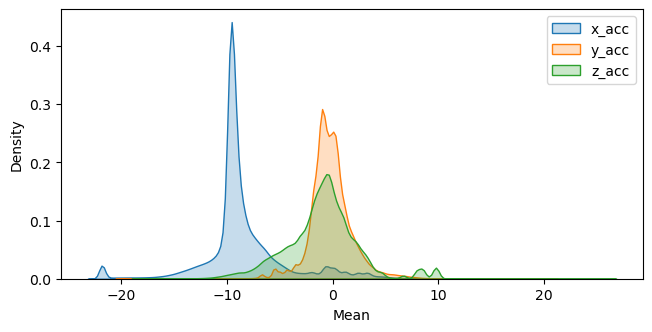

In [81]:
import seaborn as sns
plt.figure(figsize=(7.5, 3.5))
sns.kdeplot(fusioned_df['x_acc_chest'], fill=True, label='x_acc')
sns.kdeplot(fusioned_df['y_acc_chest'], fill=True, label='y_acc')
sns.kdeplot(fusioned_df['z_acc_chest'], fill=True, label='z_acc')
plt.xlabel('Mean')
plt.ylabel('Density')
plt.legend()
plt.show()


### 1.9.2 Datos del electrocardiograma

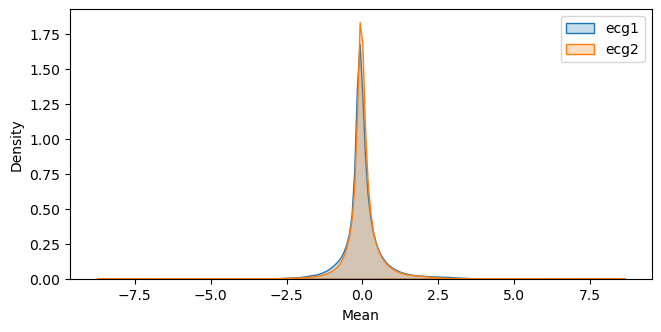

In [83]:
plt.figure(figsize=(7.5, 3.5))
sns.kdeplot(fusioned_df['ecg1'], fill=True, label='ecg1')
sns.kdeplot(fusioned_df['ecg2'], fill=True, label='ecg2')
plt.xlabel('Mean')
plt.ylabel('Density')
plt.legend()
plt.show()

### 1.9.3.    Datos inerciales del tobillo

Acelerómetro:

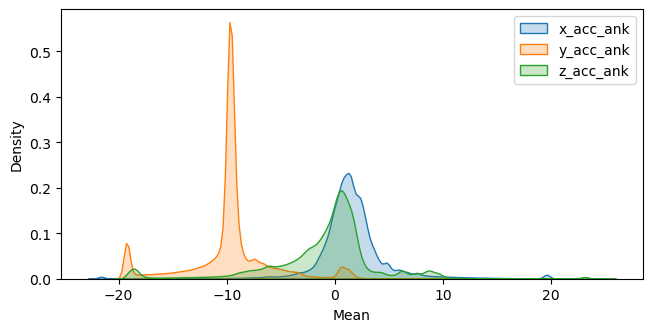

In [87]:
plt.figure(figsize=(7.5, 3.5))
sns.kdeplot(fusioned_df['x_acc_lef_ank'], fill=True, label='x_acc_ank')
sns.kdeplot(fusioned_df['y_acc_lef_ank'], fill=True, label='y_acc_ank')
sns.kdeplot(fusioned_df['z_acc_lef_ank'], fill=True, label='z_acc_ank')
plt.xlabel('Mean')
plt.ylabel('Density')
plt.legend()
plt.show()

Giroscopio:

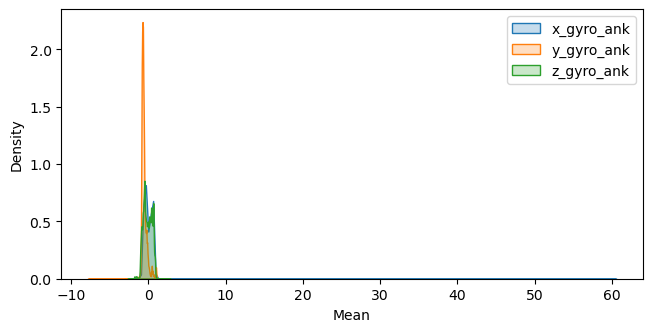

In [91]:
plt.figure(figsize=(7.5, 3.5))
sns.kdeplot(fusioned_df['x_gyro_lef_ank'], fill=True, label='x_gyro_ank')
sns.kdeplot(fusioned_df['y_gyro_lef_ank'], fill=True, label='y_gyro_ank')
sns.kdeplot(fusioned_df['z_gyro_lef_ank'], fill=True, label='z_gyro_ank')
plt.xlabel('Mean')
plt.ylabel('Density')
plt.legend()
plt.show()

Magnetómetro:

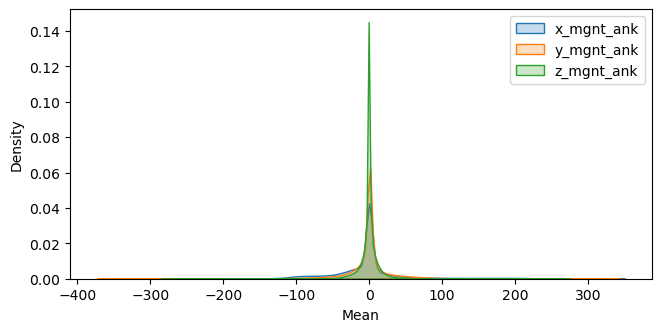

In [94]:
plt.figure(figsize=(7.5, 3.5))
sns.kdeplot(fusioned_df['x_mgnt_lef_ank'], fill=True, label='x_mgnt_ank')
sns.kdeplot(fusioned_df['y_mgnt_lef_ank'], fill=True, label='y_mgnt_ank')
sns.kdeplot(fusioned_df['z_mgnt_lef_ank'], fill=True, label='z_mgnt_ank')
plt.xlabel('Mean')
plt.ylabel('Density')
plt.legend()
plt.show()

### 1.9.4 Datos inerciales del brazo derecho

Acelerómetro:

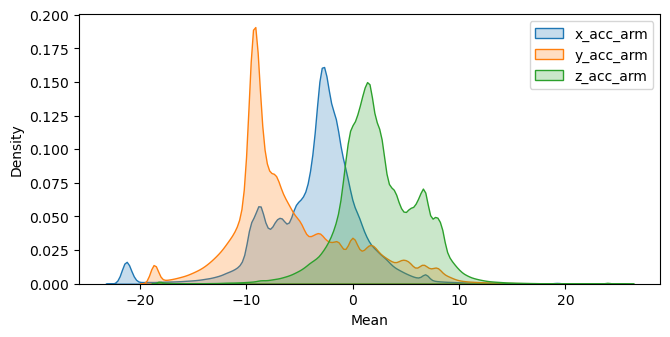

In [101]:
plt.figure(figsize=(7.5, 3.5))
sns.kdeplot(fusioned_df['x_acc_rgt_low_arm'], fill=True, label='x_acc_arm')
sns.kdeplot(fusioned_df['y_acc_rgt_low_arm'], fill=True, label='y_acc_arm')
sns.kdeplot(fusioned_df['z_acc_rgt_low_arm'], fill=True, label='z_acc_arm')
plt.xlabel('Mean')
plt.ylabel('Density')
plt.legend()
plt.show()

Giroscópio:

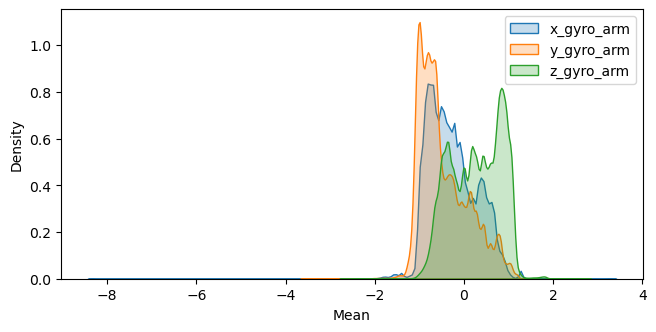

In [103]:
plt.figure(figsize=(7.5, 3.5))
sns.kdeplot(fusioned_df['x_gyro_rgt_low_arm'], fill=True, label='x_gyro_arm')
sns.kdeplot(fusioned_df['y_gyro_rgt_low_arm'], fill=True, label='y_gyro_arm')
sns.kdeplot(fusioned_df['z_gyro_rgt_low_arm'], fill=True, label='z_gyro_arm')
plt.xlabel('Mean')
plt.ylabel('Density')
plt.legend()
plt.show()

Magnetómetro:

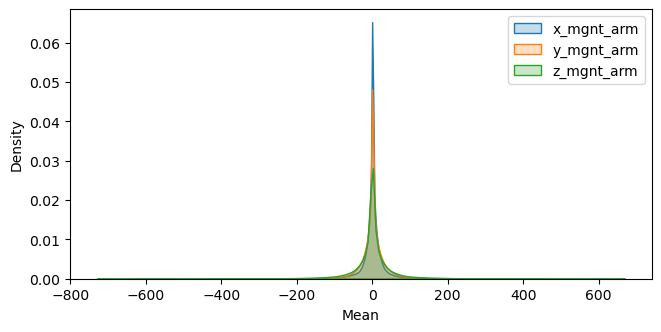

In [105]:
plt.figure(figsize=(7.5, 3.5))
sns.kdeplot(fusioned_df['x_mgnt_rgt_low_arm'], fill=True, label='x_mgnt_arm')
sns.kdeplot(fusioned_df['y_mgnt_rgt_low_arm'], fill=True, label='y_mgnt_arm')
sns.kdeplot(fusioned_df['z_mgnt_rgt_low_arm'], fill=True, label='z_mgnt_arm')
plt.xlabel('Mean')
plt.ylabel('Density')
plt.legend()
plt.show()

## 1.10. Gráfica de caja y bigotes para la distribución de los datos

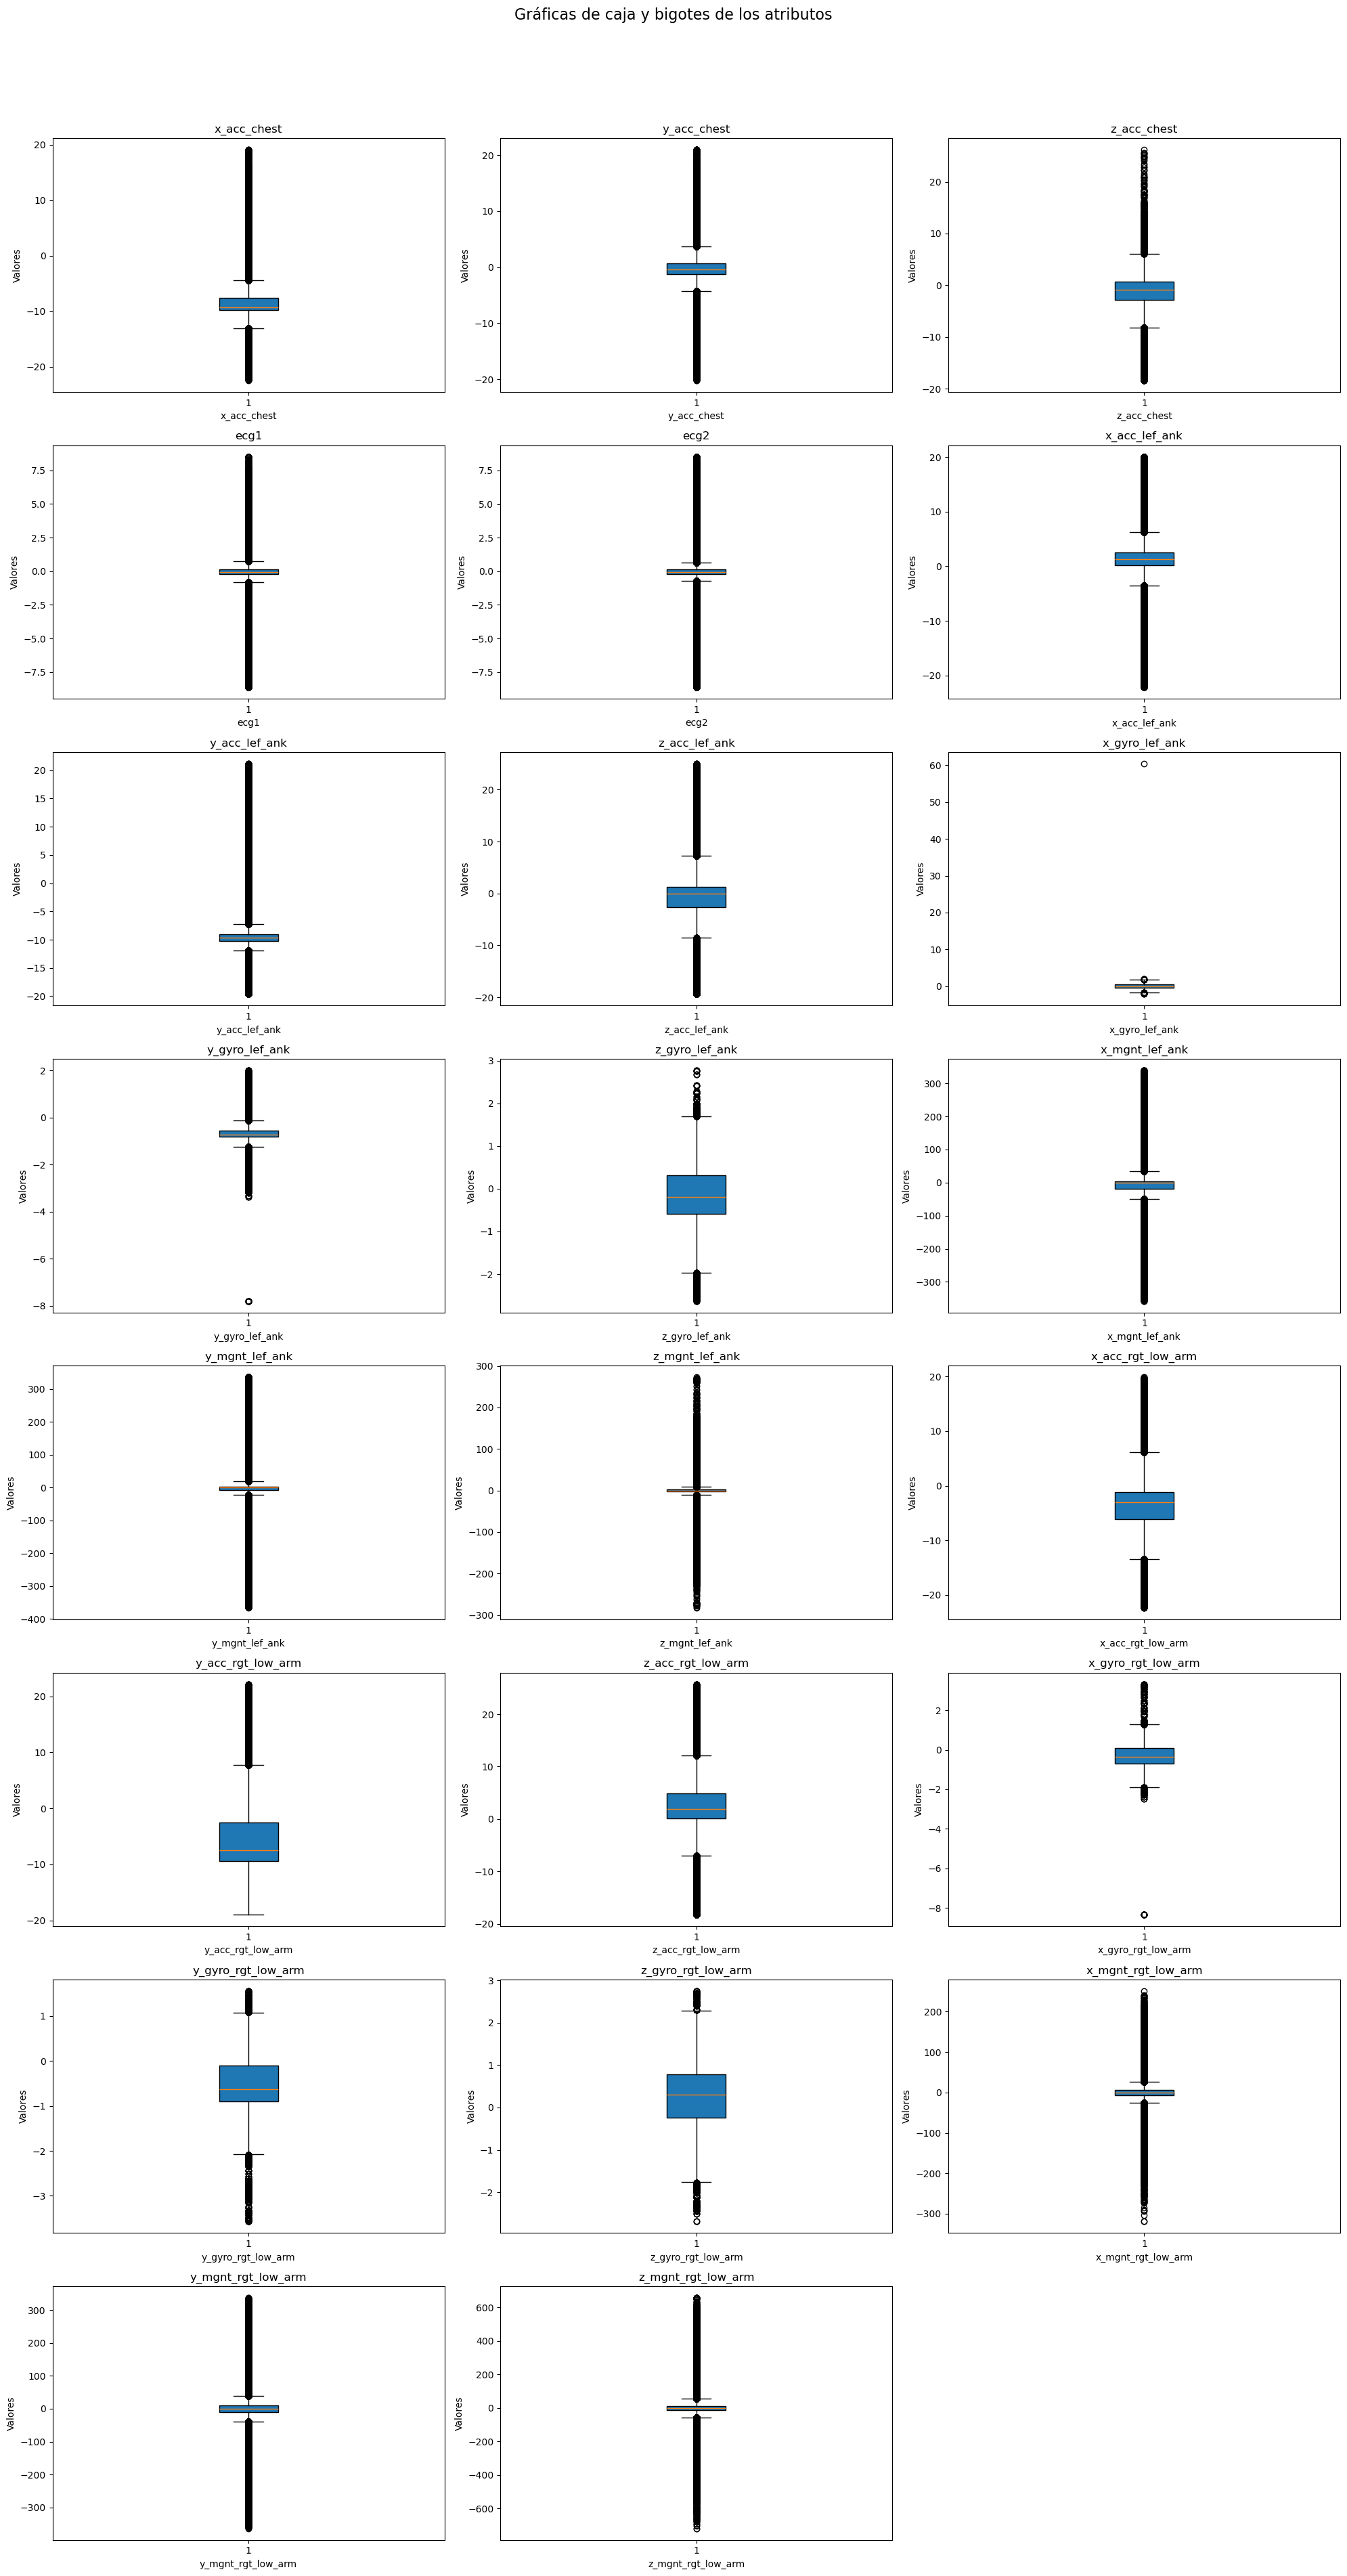

In [79]:
import matplotlib.pyplot as plt
import pandas as pd
import math

# Supongamos que fusioned_df es tu DataFrame
# Seleccionamos solo las columnas numéricas y eliminamos 'null_class' si existe
df_numeric = fusioned_df.select_dtypes(include=['number']).drop(columns=['null_class'], errors='ignore')

# Número de atributos numéricos
num_attributes = df_numeric.shape[1]

# Configuramos el layout: máximo 3 columnas por fila
cols = 3
rows = math.ceil(num_attributes / cols)

# Creamos la figura con tamaño grande
plt.figure(figsize=(20, 5 * rows))

# Iteramos sobre cada columna para generar su box plot
for i, col in enumerate(df_numeric.columns):
    ax = plt.subplot(rows, cols, i + 1)
    # Dibujamos la caja y bigotes; usamos dropna() para evitar valores nulos
    ax.boxplot(df_numeric[col].dropna(), vert=True, patch_artist=True)
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel("Valores")

plt.suptitle("Gráficas de caja y bigotes de los atributos", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## 1.11. Matriz de correlación

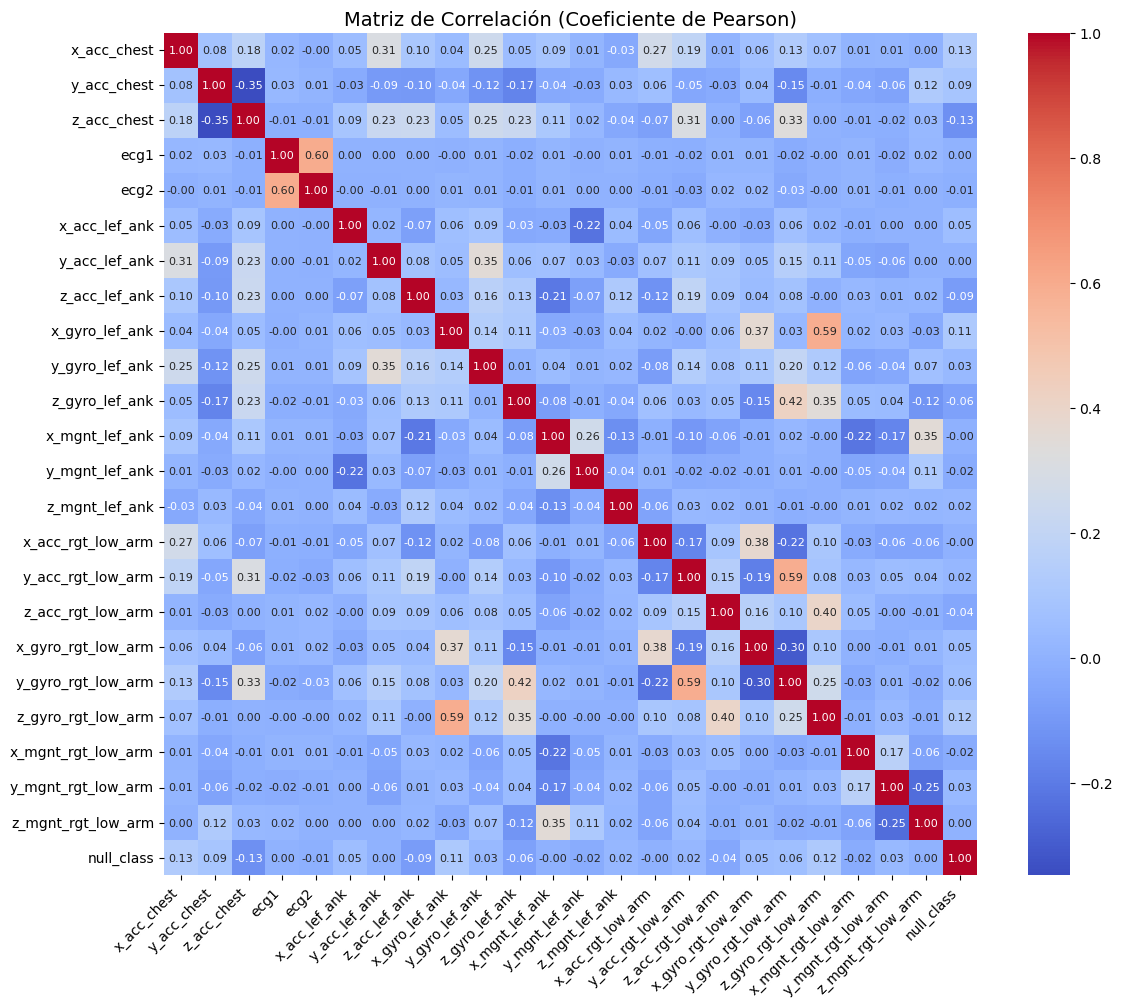

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))  
sns.heatmap(
    corr_matrix, 
    annot=True,       # Muestra valores numéricos
    fmt=".2f",        # Formato con 2 decimales
    cmap="coolwarm", 
    annot_kws={"size": 8}  # Tamaño de fuente de los valores
)

# Rotar las etiquetas del eje X para que no se encimen
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Ajusta automáticamente los márgenes
plt.tight_layout()

plt.title('Matriz de Correlación (Coeficiente de Pearson)', fontsize=14)
plt.show()


En el gráfico podemos observar que existen pocos valores que vayan más allá de 0.5, esto sugiere que los atributos no están fuertemente correlacionados. 

En concreto. Las correlaciones más altas (mayores a 0.5) se encuentarn en:

- ecg2 y ecg1
- z_gyro_rgt_low_arm y x_gyro_left_ank
- y_gyro_rgt_low_arm y y_acc_rgt_low_arm

Esto sugiere que podríamos eliminar alguna de estas características para reducir las correlaciones.